# Увеличение разрешения фотографий без потери качества

### Описание

Real_ESRGAN — это разновидность GAN (генеративно-состязательная нейросетей). Основной принцип работы таких сетей заключается в том, что она состоит из комбинации двух нейросетей, одна из которых генерирует образцы, а другая — старается отличить правильные от неправильных. <br/>

Основная задача ESRGAN — это «дорисовка» изображения для увеличения его разрешения "без потери качества", что может использоваться в различных сервисах улучшения качества старых фотографий с низким разрешением, а также в сфере полноформатной печати.

Необходимо подготовить случайный набор фотографий, скачать и адаптировать предобученную сеть, находящуюся в свободном доступе, для решения поставленной задачи.

### Цель:

Используя Real_ESRGAN увеличить набор из 10 случайных фотографий размером 100х100 в 2, 4, 8 раз каждую.

### Импорты и подготовка

Скачиваем генеративно-состязательную сеть и предобученные веса со свободного ресурса в отдельную папку: /RealESRGAN_main/,
затем импортируем в качестве модуля.

In [4]:
import torch
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from RealESRGAN_main.RealESRGAN.model import RealESRGAN

Поскольку работа данной сети с использованием CPU будет слишком медленной, переключаемся на GPU

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )

In [6]:
device

device(type='cuda')

Напишем функцию для обработки всех файлов размещенных в папке /inputs/ и сохранения в папку /results/

In [7]:
def RESRGANScaler(scale):
    # инициализация модели с заданным множителем масштабирования
    model = RealESRGAN(device, scale=scale)
    # загрузка весов
    model.load_weights(f'RealESRGAN_main/weights/RealESRGAN_x{scale}.pth')
    # получения списка всех файлов из папки
    file_list = os.listdir('./RealESRGAN_main/inputs/')
    
    for filename in file_list:
        path_to_image = f'./RealESRGAN_main/inputs/{filename}'
        # загрузка файла
        image = Image.open(path_to_image).convert('RGB')
        # получение нового изображения на основе исходного
        scaled_img = model.predict(image)
        # сохранение конечного изображения
        scaled_img.save(f'RealESRGAN_main/results/x{scale}_{filename}')
        
        del image
        del scaled_img
        print(filename, 'done')
    del model
    print(f"{len(file_list)} images have scaled")       

Загрузим 10 случайных изображений в папку /inputs/ и выполним обработку

In [8]:
RESRGANScaler(2)

abstract.jpg done
butterfly.jpg done
couple.jpg done
eguana.jpg done
flowers.jpg done
girl.jpg done
hare.jpg done
men.jpg done
runa.jpg done
vangog.jpg done
10 images have scaled


In [9]:
RESRGANScaler(4)

abstract.jpg done
butterfly.jpg done
couple.jpg done
eguana.jpg done
flowers.jpg done
girl.jpg done
hare.jpg done
men.jpg done
runa.jpg done
vangog.jpg done
10 images have scaled


In [10]:
RESRGANScaler(8)

abstract.jpg done
butterfly.jpg done
couple.jpg done
eguana.jpg done
flowers.jpg done
girl.jpg done
hare.jpg done
men.jpg done
runa.jpg done
vangog.jpg done
10 images have scaled


Для сравнения полученных результатов преобразования изображения с исходным, напишем соответствующую функцию.

In [11]:
def show_results(filename):
    plt.figure(figsize=(22, 7))
    
    print(filename)
    
    plt.subplot(1,4,1)
    image = Image.open(f'RealESRGAN_main/inputs/{filename}').convert('RGB')
    plt.title('Raw')
    plt.imshow(image)
    
    plt.subplot(1,4,2)
    image = Image.open(f'RealESRGAN_main/results/x2_{filename}').convert('RGB')
    plt.title('Scaled_x2')
    plt.imshow(image)
    
    plt.subplot(1,4,3)
    image = Image.open(f'RealESRGAN_main/results/x4_{filename}').convert('RGB')
    plt.title('Scaled_x4')
    plt.imshow(image)
    
    plt.subplot(1,4,4)
    image = Image.open(f'RealESRGAN_main/results/x8_{filename}').convert('RGB')
    plt.title('Scaled_x8')
    plt.imshow(image)
    
    plt.show()
    

In [12]:
file_list = os.listdir('./RealESRGAN_main/inputs/')

abstract.jpg


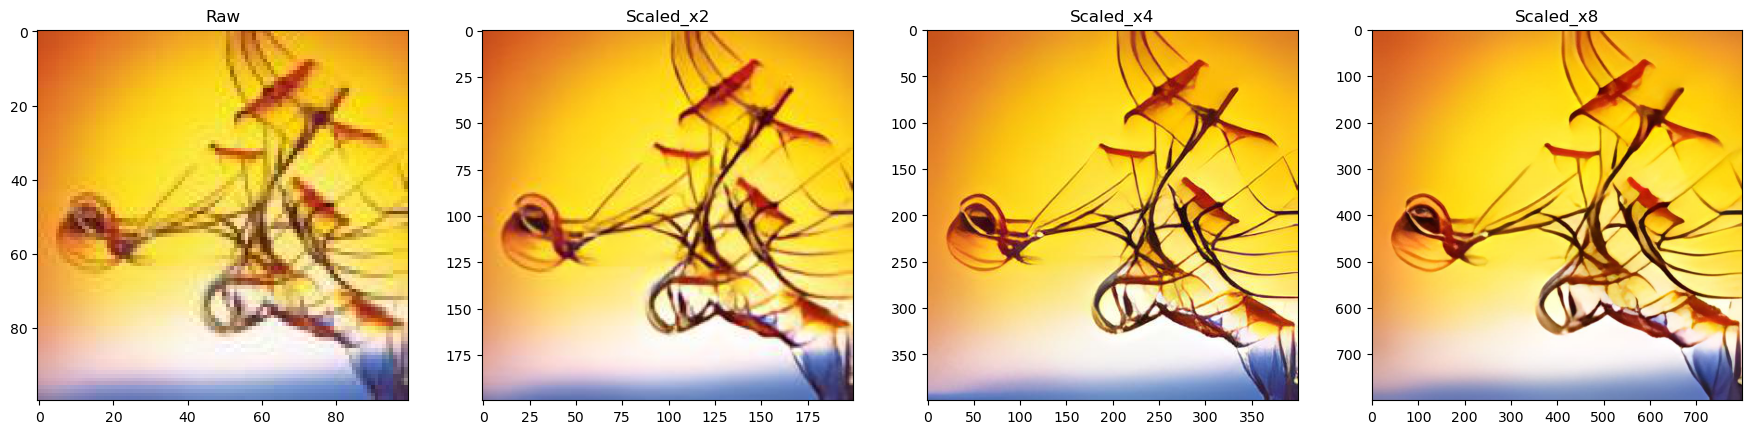

butterfly.jpg


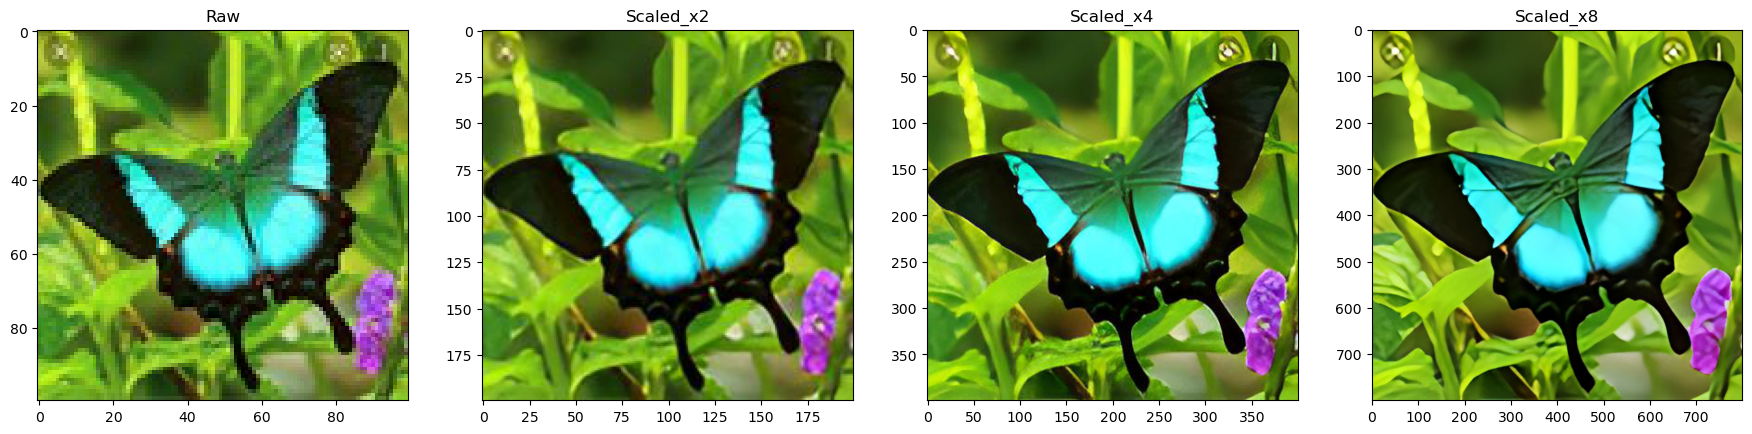

couple.jpg


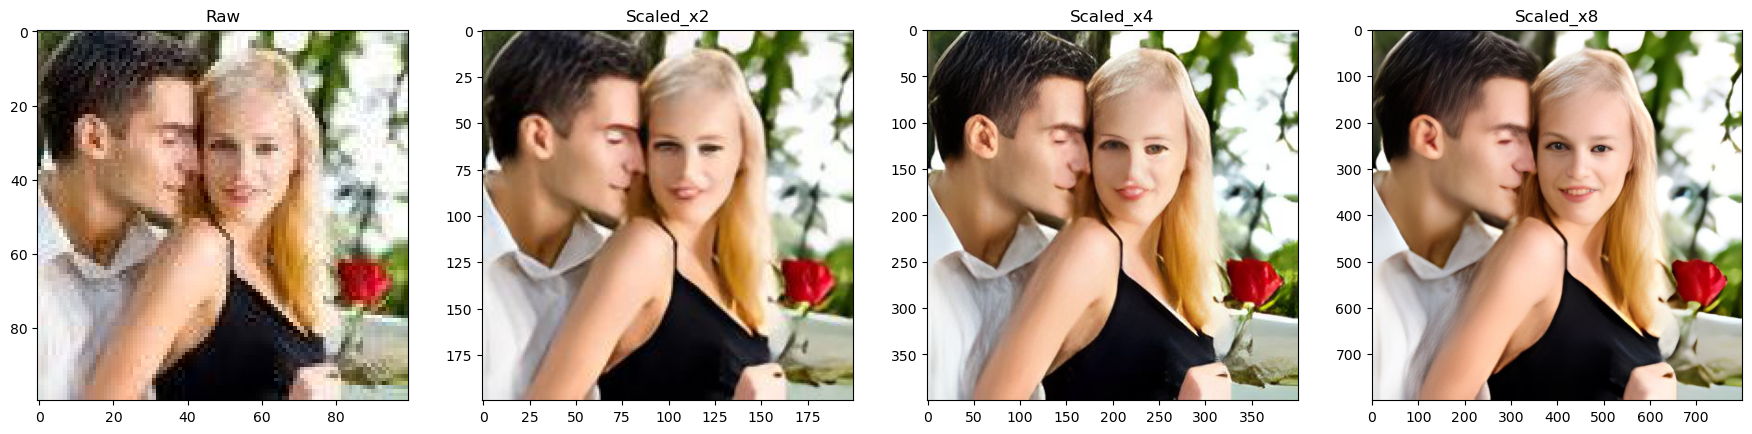

eguana.jpg


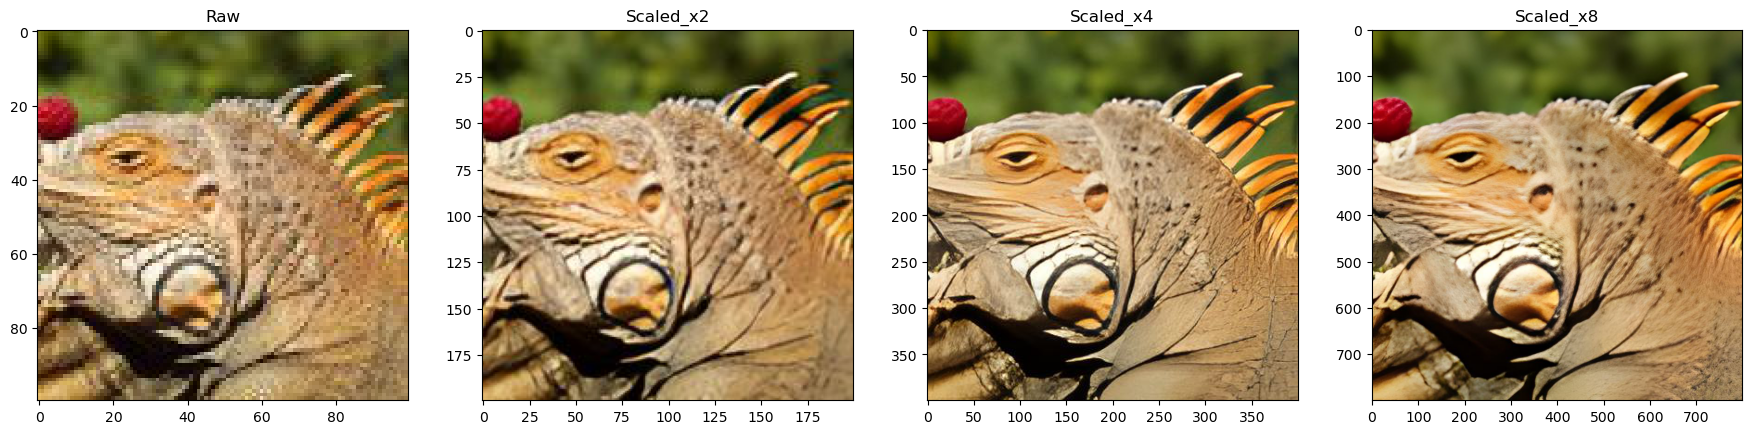

flowers.jpg


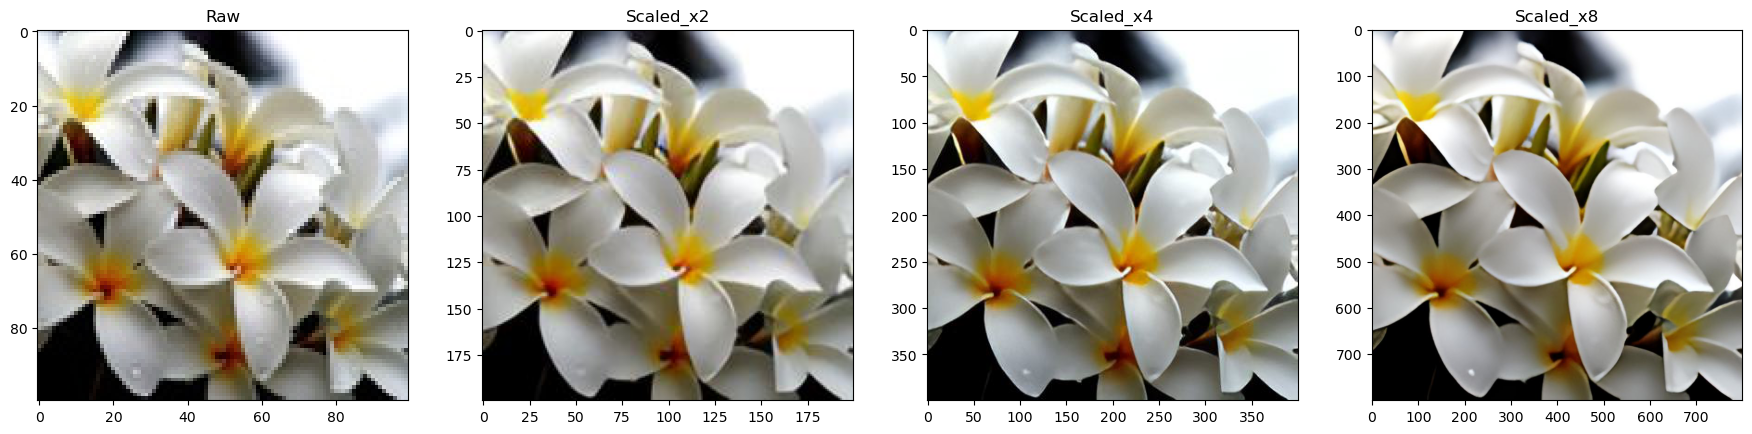

girl.jpg


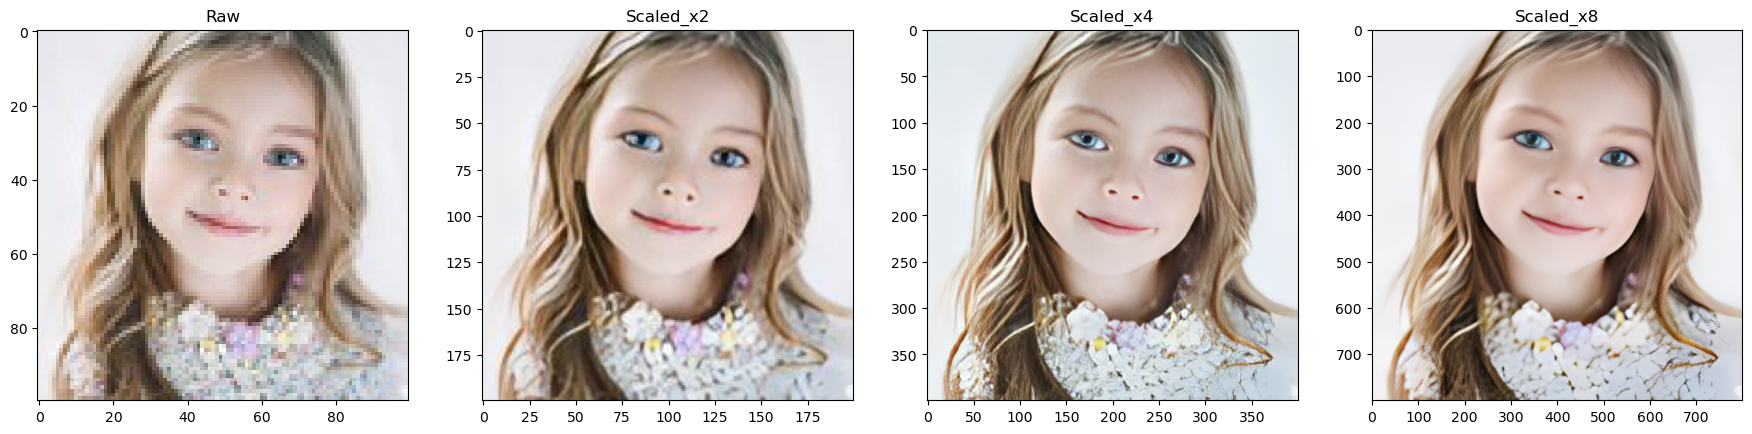

hare.jpg


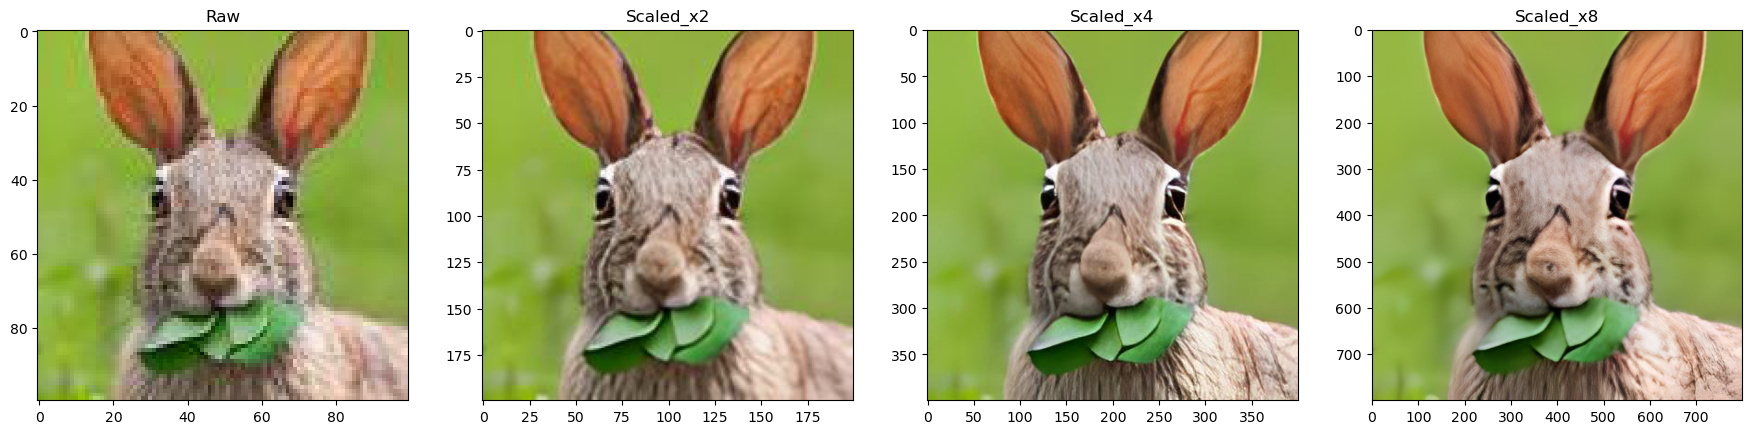

men.jpg


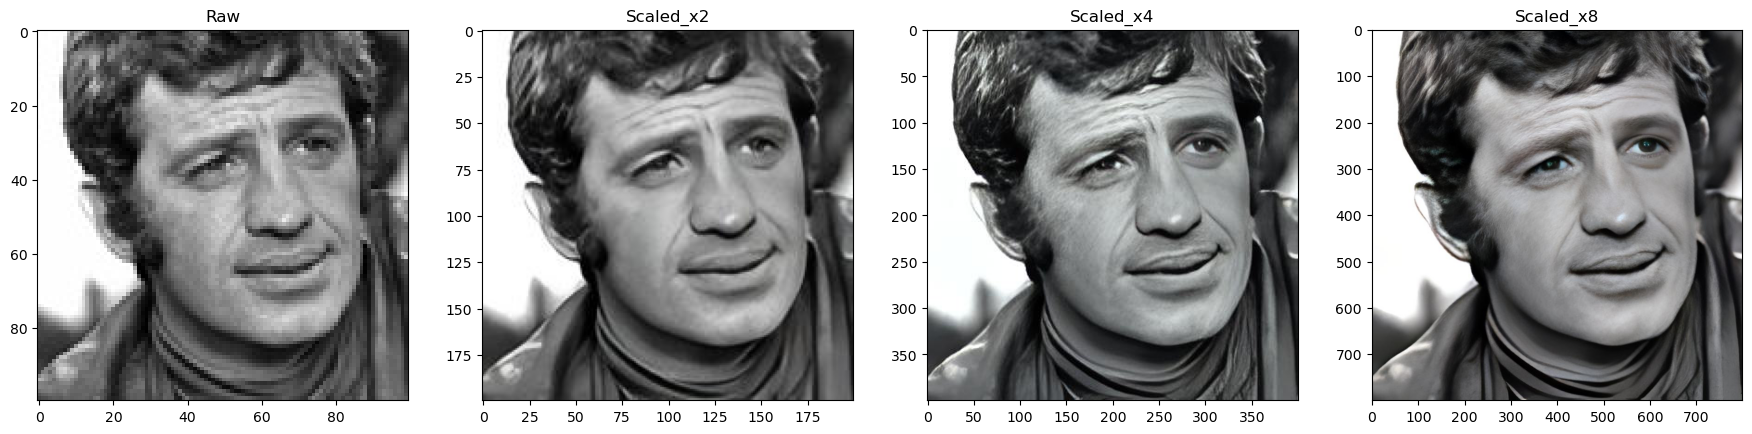

runa.jpg


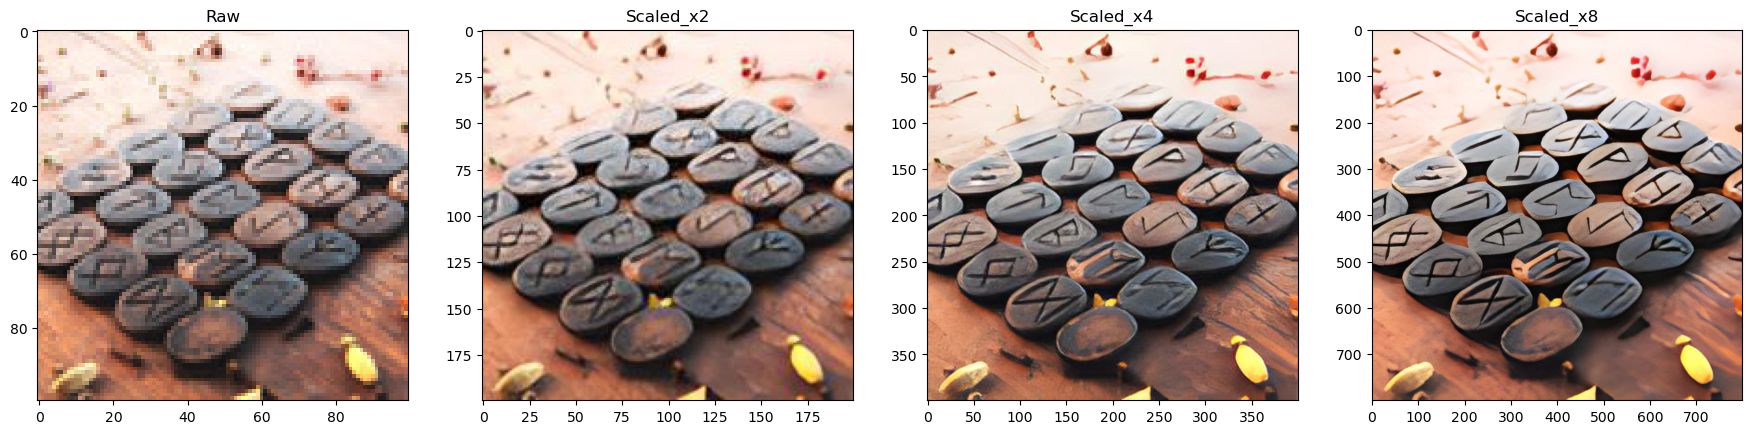

vangog.jpg


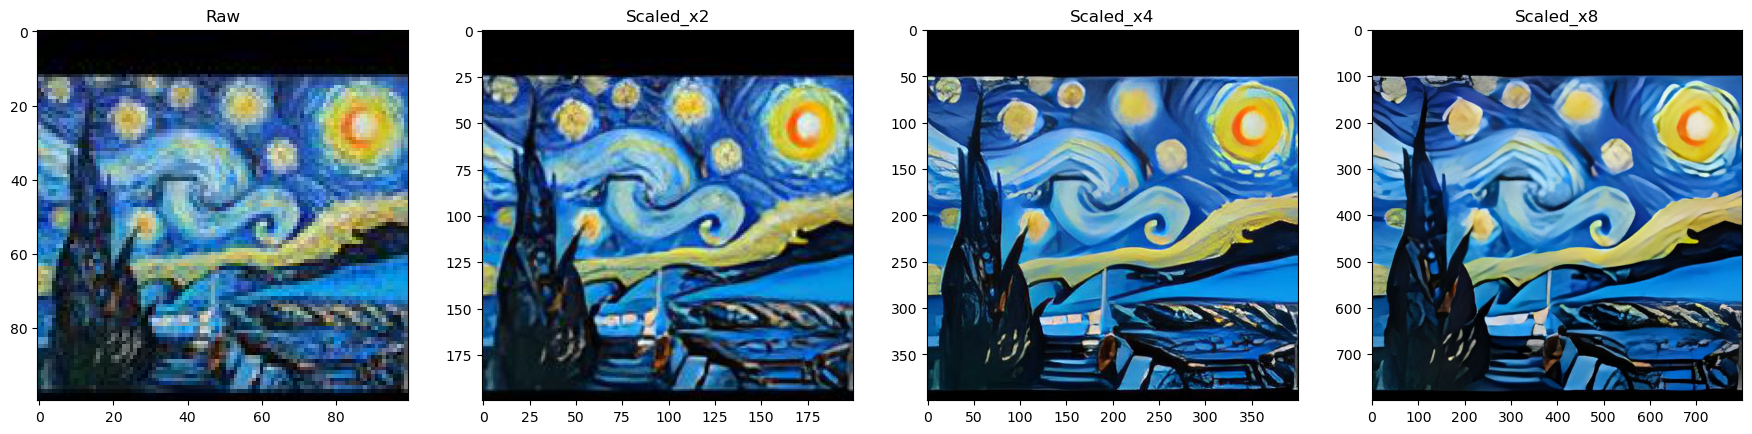

In [13]:
# прогоняем все файлы через функцию визуализации результатов

for file in file_list:
    show_results(file)

### Вывод

Генеративно-состязательные сети неплохо справляются с задачей масштабирования фотографий.

Хуже всего им удается масштабирование мелких текстур и объектов, особенно при сильном масштабировании (х8). Так на фото девочки платье потеряло первоначальную мягкость и воздушность, заяц вместо меховой шкурки приобрел "кожистое покрытие", Бельмондо помолодел, а картина Ван Гога потеряла все своим мазки кистей.

Также в некоторых случаях нарушается геометрия лиц и теряется прорисовка объектов: листы на фото бабочки, лица на фото парочки.
Однако в большинстве случаев результат является удовлетворительным, а в некоторых близкий к идеальному: игуана, цветы, руны, лицо девочки.

В некоторых случаях был получен довольно красивый эффект сглаживания, который может использоваться в качестве фильтра для изображений.